In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [20]:
EXTRACT_DIR = "../ml-latest-small"

ratings = pd.read_csv(os.path.join(EXTRACT_DIR, "ratings.csv")) 
movies_with_tags_features = pd.read_csv("../movies_with_tags_features.csv") 
data = pd.merge(ratings, movies_with_tags_features, on="movieId")

X = data.drop(columns=["userId", "movieId", "title", "rating", "timestamp"])
y = data["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = load("../models_bin/random_forest_no_timestamp.joblib")

In [29]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"✅ RMSE: {rmse:.3f}")
print(f"✅ MAE: {mae:.3f}")

✅ RMSE: 0.984
✅ MAE: 0.772


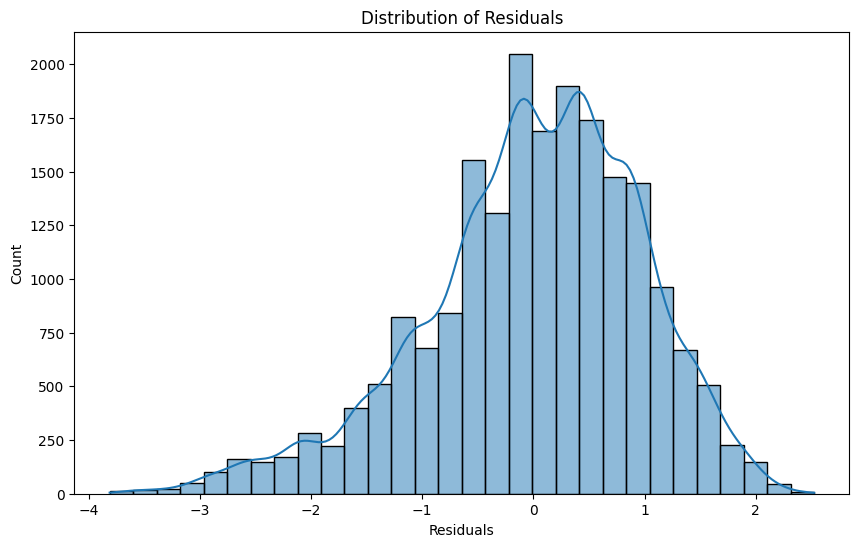

In [23]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

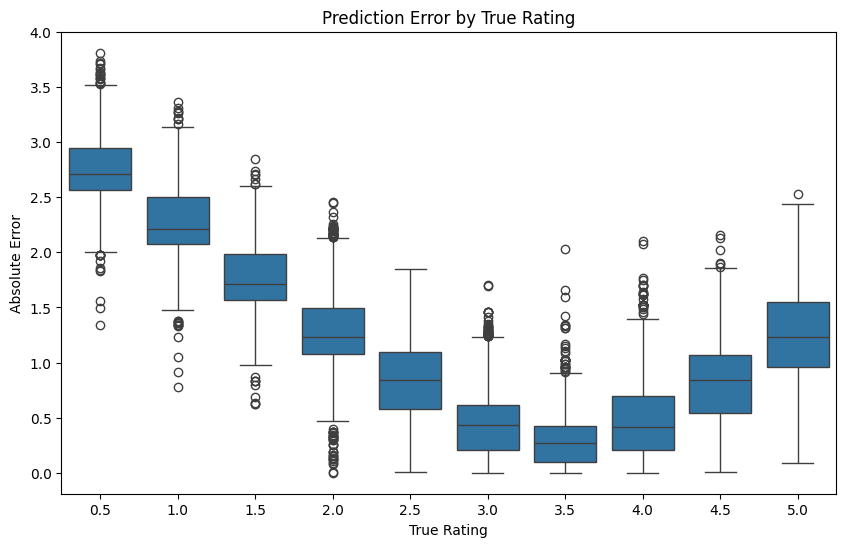

In [24]:
error_df = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
error_df["abs_error"] = abs(error_df["y_true"] - error_df["y_pred"])

plt.figure(figsize=(10, 6))
sns.boxplot(x="y_true", y="abs_error", data=error_df)
plt.xlabel("True Rating")
plt.ylabel("Absolute Error")
plt.title("Prediction Error by True Rating")
plt.show()

In [25]:
error_df

,y_true,y_pred,abs_error
67037,4.5,2.936079,1.563921
42175,3.0,3.743255,0.743255
93850,3.0,3.439656,0.439656
6187,4.0,3.585461,0.414539
12229,4.0,3.819023,0.180977
...,...,...,...
57416,2.0,2.682188,0.682188
67290,3.5,3.490444,0.009556
33423,4.5,3.956964,0.543036
98552,3.0,3.115138,0.115138


In [26]:
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

In [27]:
print(feat_imp.head(15))

Drama        0.094032
Fantasy      0.036661
Comedy       0.034035
Action       0.032276
Thriller     0.030363
Adventure    0.027638
Sci-Fi       0.027518
Animation    0.026897
Romance      0.025263
Mystery      0.023880
Children     0.022443
Horror       0.022103
Crime        0.020792
tag_fi       0.019737
tag_sci      0.017913
dtype: float64


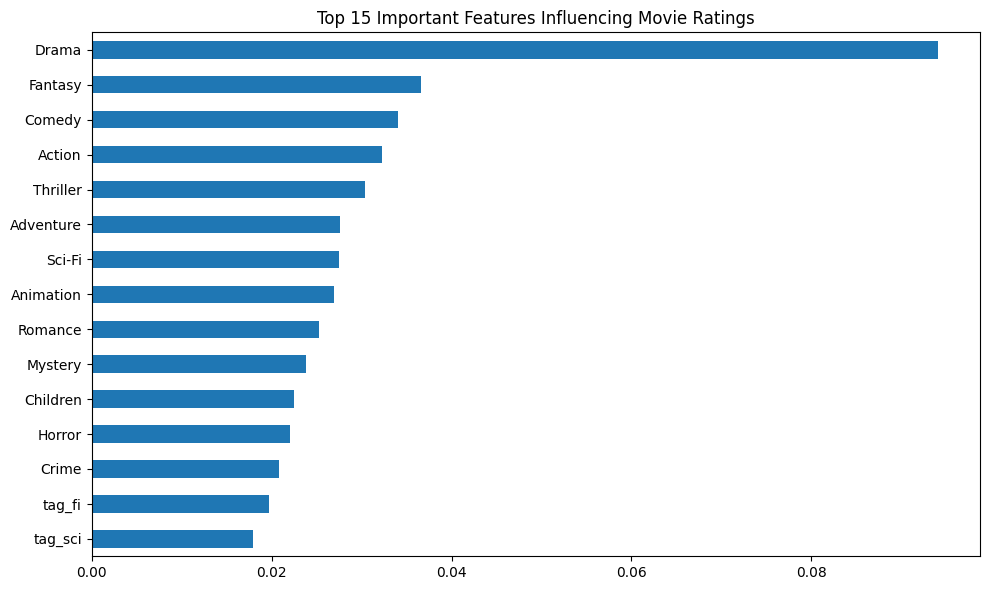

In [28]:
plt.figure(figsize=(10, 6))
feat_imp.head(15).plot(kind='barh')
plt.title("Top 15 Important Features Influencing Movie Ratings")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()